In [152]:
import ipywidgets as widgets
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [153]:
R_0_slider = widgets.FloatSlider(value=2.2, min=0, max=20, step=0.0001, description="Starting R0:")

In [154]:
N_slider = widgets.IntSlider(value=50000000, min=1, max=7000000000, step=100000, description="Population Size:")

In [155]:
D_inf_slider = widgets.FloatSlider(value=2.9, min=0, max=30, step=0.01, description="Duration of infection (days):")

In [156]:
D_inc_slider = widgets.FloatSlider(value=5.5, min=0, max=30, step=0.01, description="Incubation period (days):")

In [157]:
R_inf_slider = widgets.FloatSlider(value=2.68, min=0, max=30, step=0.0001, description="Infectious rate:")

In [158]:
R_inf_slider

FloatSlider(value=2.68, description='Infectious rate:', max=30.0, step=0.0001)

In [159]:
D_inf_slider

FloatSlider(value=2.9, description='Duration of infection (days):', max=30.0, step=0.01)

In [160]:
D_inc_slider

FloatSlider(value=5.5, description='Incubation period (days):', max=30.0, step=0.01)

In [161]:
lockdown_start_widget = widgets.IntText(value=40, description="Lockdown Start:")

In [162]:
lockdown_length_widget = widgets.IntText(value=21, description="Lockdown Length:")

In [163]:
lockdown_r_inf_widget = widgets.FloatText(value=0.1, description="Lockdown R_inf:")

In [164]:
after_lockdown_r_inf_widget = widgets.FloatText(value=0.5, description="After Lockdown R_inf:")

In [165]:
lockdown_start_widget

IntText(value=40, description='Lockdown Start:')

In [166]:
lockdown_length_widget

IntText(value=21, description='Lockdown Length:')

In [167]:
lockdown_r_inf_widget

FloatText(value=0.1, description='Lockdown R_inf:')

In [168]:
after_lockdown_r_inf_widget

FloatText(value=0.5, description='After Lockdown R_inf:')

In [169]:
# The infectious rate over time, at the moment I'm setting it to a constant
def R_inf(t):
    start = lockdown_start_widget.value
    length = lockdown_length_widget.value
    if t >= start and t <= start + length:
        return lockdown_r_inf_widget.value
    if t > start + length:
        return after_lockdown_r_inf_widget.value
    return R_inf_slider.value

In [170]:
# The population over time, at the moment I'm setting it to a constant
def N(t):
    return N_slider.value

In [171]:
# The infectious duration over time
def D_inf(t):
    return D_inf_slider.value

In [172]:
# The incubation duration rate over time
def D_inc(t):
    return D_inc_slider.value

In [173]:
# The recovery rate over time
def R_recov(t):
    return 1 / D_inf(t)

In [174]:
# The incubation rate over time
def R_inc(t):
    return 1 / D_inc(t)

In [175]:
max_t = widgets.IntSlider(value=180, min=1, max=720)

In [176]:
max_t

IntSlider(value=180, max=720, min=1)

In [177]:
t = np.arange(max_t.value)

S_vec = np.zeros(len(t))
E_vec = np.zeros(len(t))
I_vec = np.zeros(len(t))
R_vec = np.zeros(len(t))

E_vec[0] = 0
I_vec[0] = 1
R_vec[0] = 0
S_vec[0] = N(0) - I_vec[0]

In [178]:
def S(t):
    if t < 0:
        return S_vec[0]
    return S_vec[t] if S_vec[t] > 0 else 0

def E(t):
    if t < 0:
        return E_vec[0]
    return E_vec[t] if E_vec[t] > 0 else 0

def I(t):
    if t < 0:
        return I_vec[0]
    return I_vec[t] if I_vec[t] > 0 else 0

def R(t):
    if t < 0:
        return R_vec[0]
    return R_vec[t] if R_vec[t] > 0 else 0

In [179]:
def dS(t):
    return - R_inf(t) * S(t) * I(t) / N(t)

def dE(t):
    return R_inf(t) * S(t) * I(t) / N(t) - R_inc(t) * E(t)

def dI(t):
    return R_inc(t) * E(t) - R_recov(t) * I(t)

def dR(t):
    return R_recov(t) * I(t)

In [180]:
for i in t:
    t_curr = int(i + 1)
    
    if t_curr == len(t):
        continue
    
    t_prev = int(i)
    
    S_vec[t_curr] = S(t_prev) + dS(t_prev)
    E_vec[t_curr] = E(t_prev) + dE(t_prev)
    I_vec[t_curr] = I(t_prev) + dI(t_prev)
    R_vec[t_curr] = R(t_prev) + dR(t_prev)

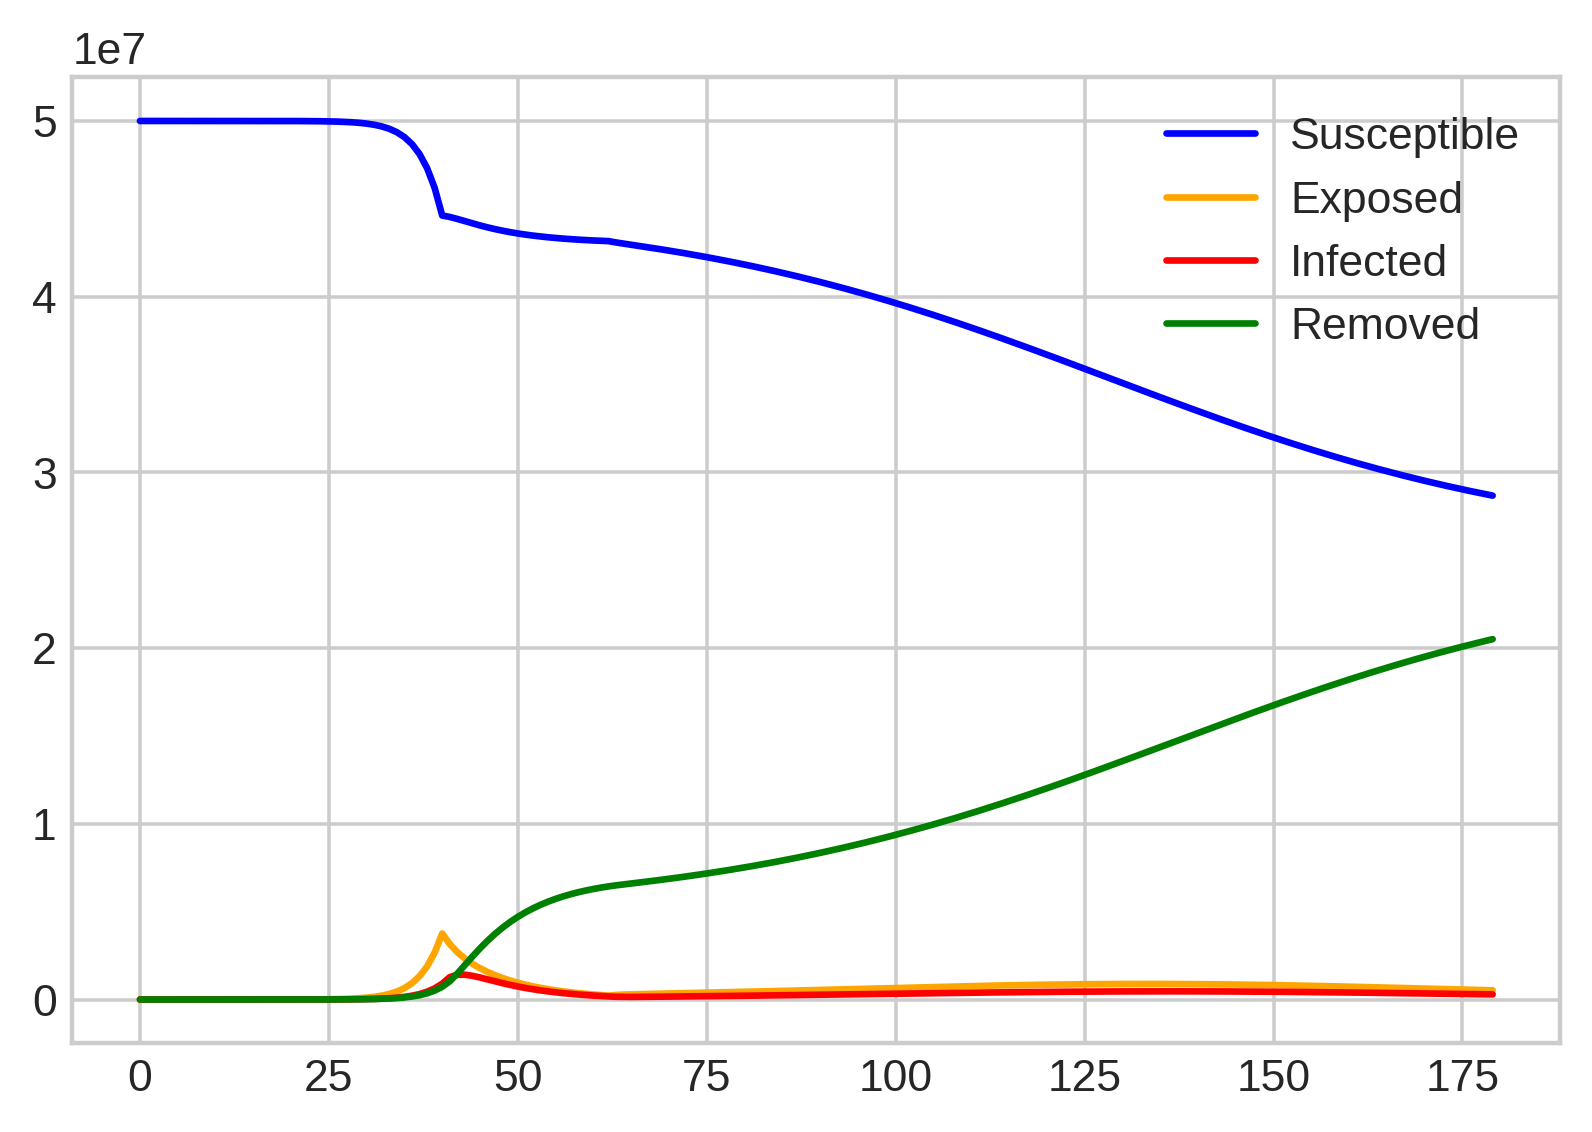

In [181]:
fig = plt.figure(dpi=320)
ax = plt.axes()

ax.plot(t, S_vec, color='blue')
ax.plot(t, E_vec, color='orange')
ax.plot(t, I_vec, color='red')
ax.plot(t, R_vec, color='green')
ax.legend(['Susceptible', 'Exposed', 'Infected', 'Removed'])